In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

data = pd.read_csv("train.csv")
data1 = pd.read_csv("test.csv")

dataCombined = pd.concat([data, data1], ignore_index=True)

print(dataCombined.info())
print(dataCombined.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127600 entries, 0 to 127599
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  127600 non-null  int64 
 1   Title        127600 non-null  object
 2   Description  127600 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB
None
   Class Index                                              Title  \
0            3  Wall St. Bears Claw Back Into the Black (Reuters)   
1            3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2            3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3            3  Iraq Halts Oil Exports from Main Southern Pipe...   
4            3  Oil prices soar to all-time record, posing new...   

                                         Description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worrie

Preprocess Data

In [2]:

texts = dataCombined['Description'].astype(str).values
labels = dataCombined['Class Index'].values

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=200)

y = to_categorical(labels)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=200),
    SimpleRNN(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


c:\Users\Humna Khan\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 52s 38ms/step - accuracy: 0.5648 - loss: 0.9604 - val_accuracy: 0.8759 - val_loss: 0.3815
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.9017 - loss: 0.3151 - val_accuracy: 0.8766 - val_loss: 0.3698
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.9223 - loss: 0.2453 - val_accuracy: 0.8917 - val_loss: 0.3532
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 49s 38ms/step - accuracy: 0.9347 - loss: 0.2055 - val_accuracy: 0.8758 - val_loss: 0.3763
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.9510 - loss: 0.1529 - val_accuracy: 0.8880 - val_loss: 0.4171


In [4]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


798/798 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8902 - loss: 0.4195
Test Loss: 0.4186694622039795
Test Accuracy: 0.889694333076477


2. Visualize Training and Validation Metrics


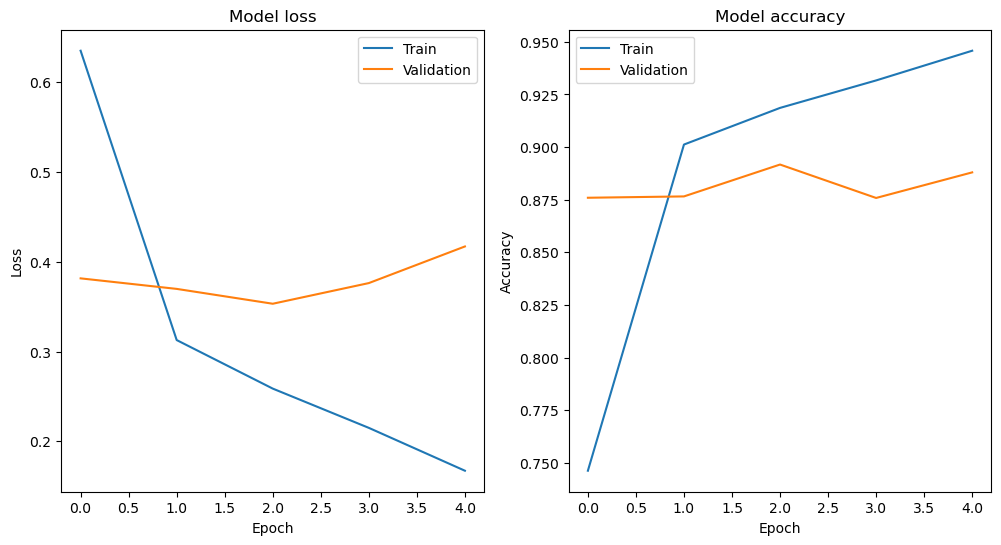

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()


3. Save the Model

In [6]:
model.save('rnn_model.h5')


4. Make Predictions



In [ ]:
# Example of predicting on new text
new_texts = ["Sample text for prediction"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=200)
predictions = model.predict(new_X)
print(predictions)
